In [1]:
import os

In [ ]:
os.getcwd()

In [1]:
import pandas 
data_train=pandas.read_csv('train.txt', sep=';')

In [5]:
data_train

,X,Y
0,0.1,0.398093
1,0.2,0.848102
2,0.3,0.747736
3,0.4,0.750563
4,0.5,-0.063083
5,0.6,-0.668985
6,0.7,-1.045593
7,0.8,-0.882890
8,0.9,-0.677255
9,1.0,-0.176933


In [2]:
data_train.shape # to get number of obs and variables

(10, 2)

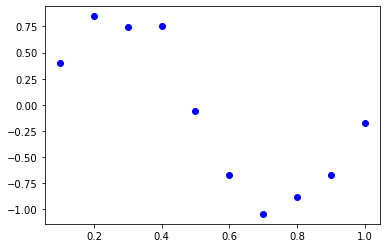

In [3]:
import matplotlib.pyplot as plt
plt.plot(data_train.X,data_train.Y,'bo') 
plt.show()

In [ ]:
#The curve shows that...

In [4]:
import numpy as np

In [5]:
fit=np.polyfit(data_train.X,data_train.Y,deg=2,full=True)

In [6]:
fit

(array([ 2.127715  , -4.15868198,  1.39108041]),
 array([1.78879032]),
 3,
 array([1.65809069, 0.4940441 , 0.08158236]),
 2.220446049250313e-15)

In [11]:
fit[0]

array([ 2.127715  , -4.15868198,  1.39108041])

In [12]:
fit[1]

array([1.78879032])

In [7]:
np.polyval(fit[0],data_train.X) #f^

array([ 0.99648936,  0.64445261,  0.33497016,  0.06804201, -0.15633183,
       -0.33815138, -0.47741663, -0.57412758, -0.62828423, -0.63988658])

In [8]:
print(min(data_train.X))
print(max(data_train.X))
print(min(data_train.Y))
print(max(data_train.Y))

0.1
1.0
-1.04559259482922
0.848102488670069


In [10]:
xp = np.linspace(0,1,100)

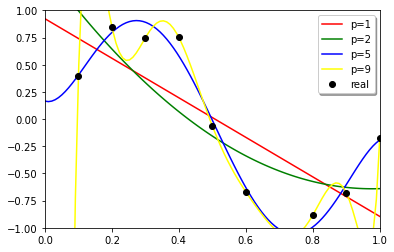

In [11]:
colors=['black', 'red', 'green', 'blue', 'yellow']
c=1
for i in [1,2,5,9]:
    fit=np.polyfit(data_train.X,data_train.Y,deg=i,full=True)
    y=np.polyval(fit[0],xp)
    plt.plot(xp,y,'-',color=colors[c])
    c+=1
plt.ylim([-1, 1])
plt.xlim([0, 1])
plt.plot(data_train.X,data_train.Y,'bo',color='black')
plt.legend(("p=1","p=2","p=5","p=9","real"),loc='upper right', shadow=True)

In [12]:
train_errors=[]
test_errors=[]
N = len(data_train)
data_test=pandas.read_csv('test.txt', sep=';')
for i in range(1,9):
    fit=np.polyfit(data_train.X,data_train.Y,deg=i,full=True)
    train_error = np.sqrt(fit[1][0]/N)
    train_errors.append(train_error)
    yhat = np.polyval(fit[0],data_test.X_test)
    test_error = np.sqrt(np.sum((yhat-data_test.Y_test)**2)/N)
    test_errors.append(test_error)
# for p=9 the train error is 0, then the command "fit[1][0]" is empty
i=9
fit=np.polyfit(data_train.X,data_train.Y,deg=i,full=True)
train_error =0
train_errors.append(train_error)
yhat = np.polyval(fit[0],data_test.X_test)
test_error = np.sqrt(np.sum((yhat-data_test.Y_test)**2)/N)
test_errors.append(test_error)
print(train_errors)
print(test_errors)

[0.45031377466010086, 0.42294093230754176, 0.13679395647261208, 0.11855064158026694, 0.08693090710700072, 0.0848964015818739, 0.05338841902168196, 0.041567242435710555, 0]
[0.5101287959402844, 0.4889744212238899, 0.30541638122926557, 0.35286874366279813, 0.27025248966305865, 0.2681678105242588, 0.6124591975314131, 1.2282767876597898, 4.63740662586401]


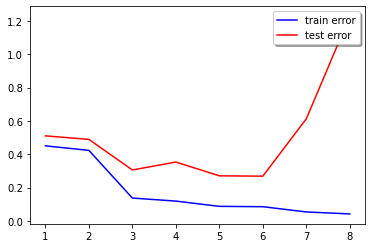

In [13]:
#MSE error plot
plt.plot(range(1,9),train_errors[:8],'-',color='blue')
plt.plot(range(1,9),test_errors[:8],'-',color='red')
plt.legend(("train error","test error"),loc='upper right', shadow=True)

In [21]:
np.argmin(test_errors)

5

[0.5101287959402844,
 0.48897442122388995,
 0.3054163812292692,
 0.35286874366280097,
 0.2702524896630741,
 0.2681678105242427,
 0.6124591975319693,
 1.228276787675957,
 4.637406625606288]